## LABIRYNTH

In [2]:
import math
import pygad
import matplotlib.pyplot as plt
import numpy 
import time

## Problem inżynieryjny: stop metali

## Problem drogi w labiryncie

In [5]:
#0 - niezamalowane pole, 1 - zamalowane pole
maze = [[1,1,1,1,1,1,1,1,1,1,1,1],
        [1,0,0,0,1,0,0,0,1,0,0,1],
        [1,1,1,0,0,0,1,0,1,1,0,1],
        [1,0,0,0,1,0,1,0,0,0,0,1],
        [1,0,1,0,1,1,0,0,1,1,0,1],
        [1,0,0,1,1,0,0,0,1,0,0,1],
        [1,0,0,0,0,0,1,0,0,0,1,1],
        [1,0,1,0,0,1,1,0,1,0,0,1],
        [1,0,1,1,1,0,0,0,1,1,0,1],
        [1,0,1,0,1,1,0,1,0,1,0,1],
        [1,0,1,0,0,0,0,0,0,0,0,1],
        [1,1,1,1,1,1,1,1,1,1,1,1]]

#0 - lewo, 1 - prawo, 2 - góra 3 - dół
gene_space = [0, 1, 2, 3]

num_genes = 30

#ile chromsomów w populacji
#ile genow ma chromosom
sol_per_pop = 200

#ile wylaniamy rodzicow do "rozmanazania" (okolo 50% populacji)
#ile pokolen
#ilu rodzicow zachowac co pokolenie(kilka procent)
num_parents_mating = 100
num_generations = 50
keep_parents = 4

#jaki typ selekcji rodzicow?
#sss = steady, rws=roulette, rank = rankingowa, tournament = turniejowa
#sss wybiera pewien procent najlepszych rodzicow, produkuje z nich potomstwo i zastepuje najgorsze chromosomy potomkami
#reszta przezywa do nastepnego pokolenia
parent_selection_type = "sss"

#w ilu punktach robic krzyzowanie?
crossover_type = "single_point"

#mutacja ma dzialac na ilu procent genow?
#1/ dlugosc chromosomu -> 1/30 = 3.3% wiec 4% jest ok
mutation_type = "random"
mutation_percent_genes = 4


In [6]:
def move(coordinate, direction):
    
    cordinate = list(coordinate)
    
    #lewo
    if direction == 0 and maze[cordinate[0] - 1][cordinate[1]] == 0:
        cordinate[0] -= 1
    #prawo
    elif direction == 1 and maze[cordinate[0] + 1][cordinate[1]] == 0:
        cordinate[0] += 1
    #góra
    elif direction == 2 and maze[cordinate[0]][cordinate[1] - 1] == 0:
        cordinate[1] -= 1   
    #dół
    elif direction == 3 and maze[cordinate[0]][cordinate[1] + 1] == 0:
        cordinate[1] += 1
    
    cordinate_tuple = tuple(cordinate)
    
    return cordinate_tuple

In [7]:
def fitness(solution, solution_idx):
    current_coord = (1,1)
    prev_coord = (1,1)
    end_coord = (10,10)
    fitness = 0

    for gene in solution:
        current_coord = move(current_coord, gene)
        if prev_coord == current_coord:
            fitness += 50 #kara za uderzenie w ścianę
        if current_coord == (1,1):
            fitness += 5000 #kara za powrót do miejsca początkowego
        if current_coord == (10,10):#jeżeli doszedł do końca
            return 1000 
             
        prev_coord = current_coord
        
    if current_coord != (10,10):
        fitness += 2000
           
    #metryka euklidesowa
    #distance = sqrt((end_coord[0] - current_coord[0]) ** 2 + (end_coord[1] - current_coord[1]) ** 2)
    
    #metryka taksówkowa
    distance = abs(current_coord[0] - end_coord[0]) + abs(current_coord[1] - end_coord[1])
    
    fitness += 1000*distance
    #chcemy im większa fitness tym gorzej
    
    return fitness*(-1)

In [8]:
def draw_maze(maze,solution):
    coordinates_zeros = []
    coordinates_ones = []
    coordinates = []
    current_coord = (1,1)
    
    for i in range(12):
        for j in range(12):
            if maze[i][j] == 0:
                coordinate_zero = (i,j)
                coordinates_zeros.append(coordinate_zero)
            else:
                coordinate_one = (i,j)
                coordinates_ones.append(coordinate_one)
                
    coordinates.append(current_coord)
    for gene in solution:
        if current_coord == (10,10): #jeżeli doszedł do końca
                break
        else:
            current_coord = move(current_coord, gene)
            coordinates.append(current_coord)
            
    fig, ax = plt.subplots(figsize= (8,8))
    for (a,b) in coordinates_zeros:
        ax.scatter(b,-a,color="#8EE5EE", marker = ',', s = 1400, edgecolor='None')
    for (a,b) in coordinates_ones:
        ax.scatter(b,-a,color="#808080", marker = ',', s = 1400, edgecolor='None')
    ax.scatter(1,-1,color="#FF7D40", marker = ',', s = 1400, edgecolor='None')
    ax.scatter(10,-10,color="#228B22", marker = ',', s = 1400, edgecolor='None')
    for (a,b) in coordinates:
        ax.scatter(b,-a,color="black", marker = 9, s = 90, edgecolor='None')

Parametery najlepszego rozwiązania : [3. 3. 1. 3. 3. 0. 0. 3. 3. 1. 1. 1. 1. 3. 1. 3. 2. 2. 3. 3. 1. 1. 3. 1.
 3. 3. 1. 1. 3. 1.]
Fitness najlepszego rozwiązania = 1000
Ile pokoleń minęło, aż do znalezienia najlepszego rozwiązania: 16


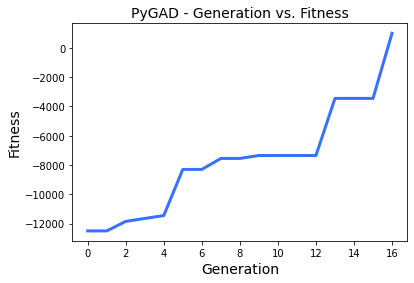

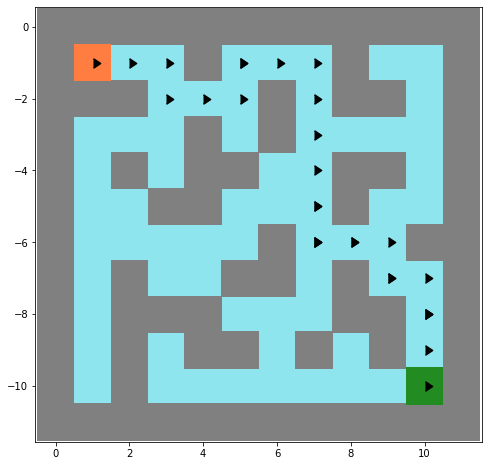

In [9]:
fitness_function = fitness

ga_instance = pygad.GA(gene_space=gene_space,
                       num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       stop_criteria="reach_1000",
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes)

#uruchomienie algorytmu
ga_instance.run()

#podsumowanie: najlepsze znalezione rozwiazanie (chromosom+ocena)
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parametery najlepszego rozwiązania : {solution}".format(solution=solution)) #tu dostaje liste ruchow
print("Fitness najlepszego rozwiązania = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Ile pokoleń minęło, aż do znalezienia najlepszego rozwiązania: {generations_completed}".format(generations_completed=ga_instance.generations_completed))
#wyswietlenie wykresu: jak zmieniala sie ocena na przestrzeni pokolen
ga_instance.plot_fitness()
        
draw_maze(maze,solution)

## Średni czas 10 uruchomień

In [9]:
czasy = []
for i in range(10):
    start = time.time()
    #inicjacja algorytmu z powyzszymi parametrami wpisanymi w atrybuty
    ga_instance = pygad.GA(gene_space=gene_space,
                           num_generations=num_generations,
                           num_parents_mating=num_parents_mating,
                           fitness_func=fitness,
                           stop_criteria="reach_1000",
                           sol_per_pop=sol_per_pop,
                           num_genes=num_genes,
                           parent_selection_type=parent_selection_type,
                           keep_parents=keep_parents,
                           crossover_type=crossover_type,
                           mutation_type=mutation_type,
                           mutation_percent_genes=mutation_percent_genes)

    #uruchomienie algorytmu
    ga_instance.run()
    end = time.time()
    czas = end - start
    czasy.append(czas)
    
print("Średnia z czasów: {}".format(numpy.mean(czasy)))

Średnia z czasów: 0.24722709655761718
